# Stuart Harley

### Machine Learning Week 4 Problem Set

### 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import math

In [2]:
wine_data = load_wine()
wine_data = pd.DataFrame(data=np.c_[wine_data['data'], wine_data['target']],\
                         columns=wine_data['feature_names'] + ['target'])

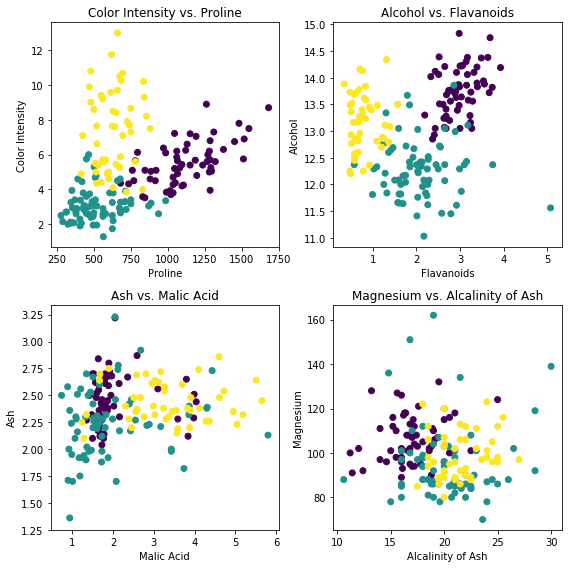

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axes[0,0].scatter(wine_data['proline'], wine_data['color_intensity'], c=wine_data['target'])
axes[0,0].set_xlabel('Proline')
axes[0,0].set_ylabel('Color Intensity')
axes[0,0].set_title('Color Intensity vs. Proline')
axes[0,1].scatter(wine_data['flavanoids'], wine_data['alcohol'], c=wine_data['target'])
axes[0,1].set_xlabel('Flavanoids')
axes[0,1].set_ylabel('Alcohol')
axes[0,1].set_title('Alcohol vs. Flavanoids')
axes[1,0].scatter(wine_data['malic_acid'], wine_data['ash'], c=wine_data['target'])
axes[1,0].set_xlabel('Malic Acid')
axes[1,0].set_ylabel('Ash')
axes[1,0].set_title('Ash vs. Malic Acid')
axes[1,1].scatter(wine_data['alcalinity_of_ash'], wine_data['magnesium'], c=wine_data['target'])
axes[1,1].set_xlabel('Alcalinity of Ash')
axes[1,1].set_ylabel('Magnesium')
axes[1,1].set_title('Magnesium vs. Alcalinity of Ash')
fig.tight_layout();

Color Intensity & Proline : classes can be easily separated

Alcohol & Flavanoids : classes can be easily separated

Ash & Malic Acid : classes can not be easily separated

Magnesium & Alcalinity of Ash : classes can not be easily separated

1) Alcohol .5, Color Intensity 5, Flavanoids 1, Proline 500 : Predicted class = 2

2) Alcohol .75, Color Intesity 4.25, Flavanoids .75, Proline 525 : Predicted class = 2

3) Alcohol 0, Color Intesnity 4, Flavanoids 3, Proline 800 : Predicted class = 0

1) Flavanoids <= 1 && Color Intensity > 4.85 && Proline <= 755

2) Color Intensity > 2.9 && Flavanoids <= .895 && Color Intensity <= 4.85 && Proline <= 755

3) Color Intensity > 3.435 && Flavanoids > 2.165 && Proline > 755

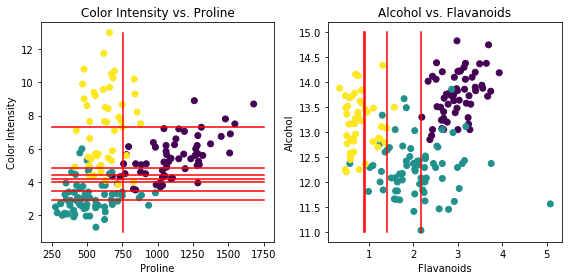

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
axes[0].scatter(wine_data['proline'], wine_data['color_intensity'], c=wine_data['target'])
axes[0].set_xlabel('Proline')
axes[0].set_ylabel('Color Intensity')
axes[0].set_title('Color Intensity vs. Proline')
axes[1].scatter(wine_data['flavanoids'], wine_data['alcohol'], c=wine_data['target'])
axes[1].set_xlabel('Flavanoids')
axes[1].set_ylabel('Alcohol')
axes[1].set_title('Alcohol vs. Flavanoids')
fig.tight_layout()

axes[0].plot([250, 1750], [2.9, 2.9], c='r')
axes[1].plot([.895, .895], [11, 15], c='r')
axes[0].plot([250, 1750], [4.02, 4.02], c='r')
axes[0].plot([250, 1750], [4.405, 4.405], c='r')
axes[0].plot([250, 1750], [4.21, 4.21], c='r')
axes[0].plot([250, 1750], [4.85, 4.85], c='r')
axes[1].plot([1.4, 1.4], [11, 15], c='r')
axes[0].plot([250, 1750], [7.3, 7.3], c='r')
axes[0].plot([755, 755], [1, 13], c='r')
axes[1].plot([2.165, 2.165], [11, 15], c='r')
axes[1].plot([.9, .9], [11, 15], c='r')
axes[0].plot([250, 1750], [3.435, 3.435], c='r');

The two trees are different sizes because the features that are being used to classify the data do so at different effectivenesses. The color intensity, proline, alcohol, and flavanoids features (DT 1) easily separate the different classes so the tree needs to make fewer decision boundaries to classify them. However, the ash, malic acid, magnesium, and alcalinity of ash features (DT 2) does not easily separate the classes so many more boundaries are needed to classify the points so the tree is much larger.

Multi-class problems are handled with decision trees by continually adding more linear decision boundaries until the points are separated into many subsets, each with 1 classification.

### 2)

In [5]:
wine_data.loc[wine_data['target'] == 1, 'target'] = 0
wine_data.loc[wine_data['target'] == 2, 'target'] = 1

In [6]:
X = StandardScaler().fit_transform(np.array([wine_data['hue'], wine_data['flavanoids']]).T)
svm1 = svm.SVC(kernel='linear', C=1).fit(X, wine_data['target']);
svm10 = svm.SVC(kernel='linear', C=10).fit(X, wine_data['target']);
svm100 = svm.SVC(kernel='linear', C=100).fit(X, wine_data['target']);
svm1000 = svm.SVC(kernel='linear', C=1000).fit(X, wine_data['target']);

In [7]:
sv1 = svm1.support_vectors_
sv10 = svm10.support_vectors_
sv100 = svm100.support_vectors_
sv1000 = svm1000.support_vectors_

In [8]:
w1 = svm1.coef_[0]
a1 = -w1[0] / w1[1]
w10 = svm10.coef_[0]
a10 = -w10[0] / w10[1]
w100 = svm100.coef_[0]
a100 = -w100[0] / w100[1]
w1000 = svm1000.coef_[0]
a1000 = -w1000[0] / w1000[1]

In [9]:
x = np.linspace(-2.5, 3.5, 2)
y1 = a1 * x - (svm1.intercept_[0]) / w1[1]
y10 = a10 * x - (svm10.intercept_[0]) / w10[1]
y100 = a100 * x - (svm100.intercept_[0]) / w100[1]
y1000 = a1000 * x - (svm1000.intercept_[0]) / w1000[1]

In [10]:
margin1 = 1 / np.sqrt(np.sum(svm1.coef_ ** 2))
y1_down = y1 - np.sqrt(1 + a1 ** 2) * margin1
y1_up = y1 + np.sqrt(1 + a1 ** 2) * margin1
margin10 = 1 / np.sqrt(np.sum(svm10.coef_ ** 2))
y10_down = y10 - np.sqrt(1 + a10 ** 2) * margin10
y10_up = y10 + np.sqrt(1 + a10 ** 2) * margin10
margin100 = 1 / np.sqrt(np.sum(svm100.coef_ ** 2))
y100_down = y100 - np.sqrt(1 + a100 ** 2) * margin100
y100_up = y100 + np.sqrt(1 + a100 ** 2) * margin100
margin1000 = 1 / np.sqrt(np.sum(svm1000.coef_ ** 2))
y1000_down = y1000 - np.sqrt(1 + a1000 ** 2) * margin1000
y1000_up = y1000 + np.sqrt(1 + a1000 ** 2) * margin1000

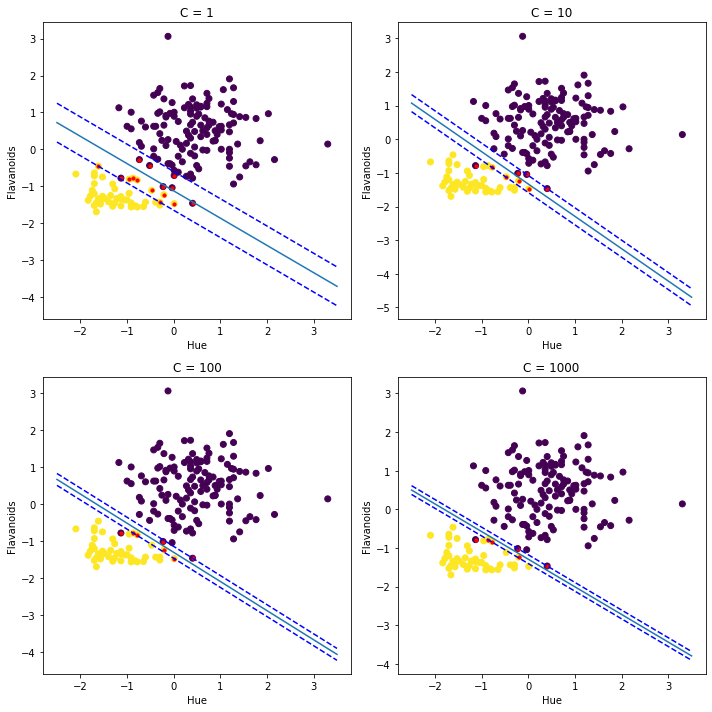

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0,0].scatter(X[:,0], X[:,1], c=wine_data['target'])
axes[0,0].scatter(sv1[:,0], sv1[:,1], c='r', s=10,)
axes[0,0].plot(x, y1)
axes[0,0].plot(x, y1_down, 'b--')
axes[0,0].plot(x, y1_up, 'b--')
axes[0,0].set_xlabel('Hue')
axes[0,0].set_ylabel('Flavanoids')
axes[0,0].set_title('C = 1')
axes[0,1].scatter(X[:,0], X[:,1], c=wine_data['target'])
axes[0,1].scatter(sv10[:,0], sv10[:,1], c='r', s=10)
axes[0,1].plot(x, y10_down, 'b--')
axes[0,1].plot(x, y10_up, 'b--')
axes[0,1].plot(x, y10)
axes[0,1].set_xlabel('Hue')
axes[0,1].set_ylabel('Flavanoids')
axes[0,1].set_title('C = 10')
axes[1,0].scatter(X[:,0], X[:,1], c=wine_data['target'])
axes[1,0].scatter(sv100[:,0], sv100[:,1], c='r', s=10)
axes[1,0].plot(x, y100_down, 'b--')
axes[1,0].plot(x, y100_up, 'b--')
axes[1,0].plot(x, y100)
axes[1,0].set_xlabel('Hue')
axes[1,0].set_ylabel('Flavanoids')
axes[1,0].set_title('C = 100')
axes[1,1].scatter(X[:,0], X[:,1], c=wine_data['target'])
axes[1,1].scatter(sv1000[:,0], sv1000[:,1], c='r', s=10)
axes[1,1].plot(x, y1000)
axes[1,1].plot(x, y1000_down, 'b--')
axes[1,1].plot(x, y1000_up, 'b--')
axes[1,1].set_xlabel('Hue')
axes[1,1].set_ylabel('Flavanoids')
axes[1,1].set_title('C = 1000')
fig.tight_layout();

The C value penalizes the sum of slack variables. Therefore, as the value of C goes up, the margins get harder. What this means is that that for higher values of C, our support vector points have to be on the outside of the margins more strictly. Therefore, the margins get smaller as C goes up, and the placement of the support vectors and margins determines the path of the decision boundary.

### 3)

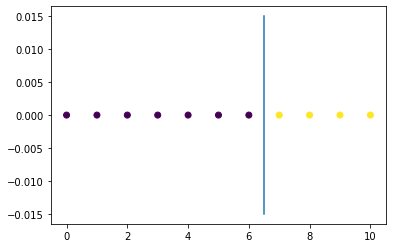

In [12]:
k1 = np.loadtxt('Kernel_Problem_1.csv', delimiter=',')
plt.scatter(k1[:,0], np.zeros(11), c=k1[:,1])
plt.plot([6.5, 6.5], [-.015, .015]);

These observations are linearly separable. The hyperplane to divide these features would be n=<1,0>, r0=(6.5, 0) aka (x=6.5)

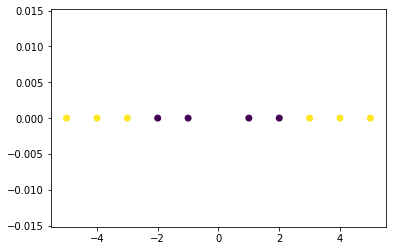

In [13]:
k2 = np.loadtxt('Kernel_Problem_2.csv', delimiter=',')
plt.scatter(k2[:,0], np.zeros(10), c=k2[:,1]);

Currently, these observations are not linearly separable.

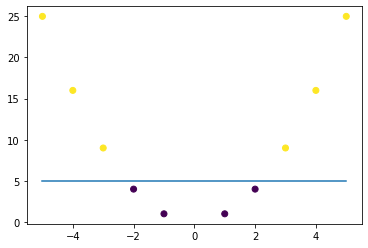

In [14]:
plt.scatter(k2[:,0], k2[:,0] ** 2, c=k2[:,1])
plt.plot([-5, 5], [5,5]);

These observations are now linearly separable.

n = <0,1> and r0 = (0,5) become y=5. ^ as shown in graph.

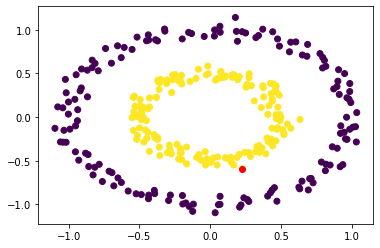

In [15]:
k3 = np.loadtxt('Kernel_Problem_3.csv', delimiter=',')
plt.scatter(k3[:,0], k3[:,1], c=k3[:,2])
plt.scatter(k3[257,0], k3[257,1], c='r');

Currently these observations are not linearly separable.

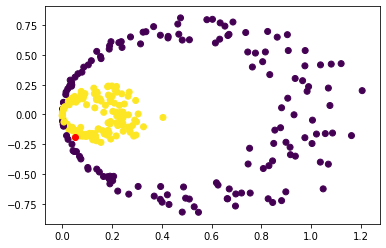

In [16]:
plt.scatter(k3[:,0] ** 2, math.sqrt(2) * k3[:,0] * k3[:,1], c=k3[:,2])
plt.scatter(k3[257,0] ** 2, math.sqrt(2) * k3[257,0] * k3[257,1], c='r');

^ feature1 vs. feature2. Still not linearly separable.

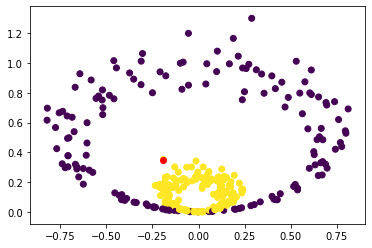

In [17]:
plt.scatter(math.sqrt(2) * k3[:,0] * k3[:,1], k3[:,1] ** 2, c=k3[:,2])
plt.scatter(math.sqrt(2) * k3[257,0] * k3[257,1], k3[257,1] ** 2, c='r');

^ feature2 vs. feature3. Still not linearly separable.

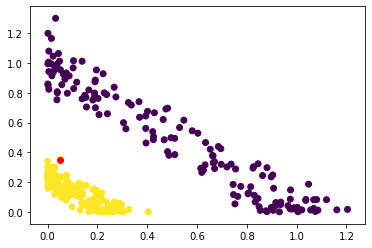

In [18]:
plt.scatter(k3[:,0] ** 2, k3[:,1] ** 2, c=k3[:,2])
plt.scatter(k3[257,0] ** 2, k3[257,1] ** 2, c='r');

^ feature1 vs. feature3. It is now linealy separable.

In [19]:
a = k3[257, 0:2]
b = k3[259, 0:2]
c = k3[264, 0:2]
print(np.dot(a, b))
print(np.dot(a, c))

0.31253623557629184
0.2720446842092134


In [20]:
print(np.dot(a, b) ** 2)
print(np.dot(a, c) ** 2)

0.09767889854819939
0.07400831020649065


Observation 260 belongs to class 0. Observation 265 belongs to class 1.

For the evaluations, the evaluations of 258 and 260 are larger than the evaluations of 258 and 265.

If a is an identified support vector, steps i and ii can be leveraged for classifying observations by calculating the values and classifying them based on those.